In [1]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from pandas import read_csv

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import collections
%matplotlib inline

Using TensorFlow backend.
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jocelyn/opt/anaconda3/lib/pytho

In [2]:
# Set up a 'look back' dataset for sequence to label prediction with Keras.

# The LSTM network expects the input data (X) to be provided with a specific
# array structure in the form of: [samples, time steps, features].

# create_dataset is adapted from
# http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

def create_dataset(X, Y, **options):
    """Convert an array of X, Y values into a dataset matrix for and LSTM"""
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

# Predictions will be based on look_back minutes of data:
look_back = 50

In [ ]:
Test1 = glob.glob('C:\\Users\\XWANG221\\Downloads\\Mixed_Flow\\VolvoData\\ALLCutInTest\\*.csv')

X_Test1 = np.empty((1, 50, 28))
Y_Test1 = np.empty((1,))

for f in range(400):
    print(Test1[f].split('\\')[-1])
  
    CutIn_Test1 = pd.read_csv(Test1[f], usecols=['Lat','Long','Lane','Velocity','PosLgt2','PosLgt3','VelLgt1','VelLgt2','VelLgt3','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Id1','Id2','Lane1','PositionInLane1','PositionInLane2','PositionInLane3','Lead','CutIn'])
    CutIn_Test1.fillna(10000000, inplace=True)
    
    Y_train_Test1 = np.array(CutIn_Test1['CutIn'].values)
    X_train_Test1 = np.array(CutIn_Test1[['Lat','Long','Lane','Velocity','PosLgt2','PosLgt3','VelLgt1','VelLgt2','VelLgt3','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Id1','Id2','Lane1','PositionInLane1','PositionInLane2','PositionInLane3','Lead']])

    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train_Test1.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train_Test1 = scaler.fit_transform(X_train_Test1)
    #print(len(X_train))
    #print(X_train_Test1.shape, Y_train_Test1.shape)
    
    XTest1, YTest1 = create_dataset(X_train_Test1, Y_train_Test1, look_back=look_back)
    #print(XTest1.shape, YTest1.shape)
    
    X_Test1 = np.append(X_Test1, XTest1, axis=0)
    Y_Test1 = np.append(Y_Test1, YTest1, axis=0)

In [4]:
path = glob.glob('C:\\Users\\XWANG221\\Downloads\\Mixed_Flow\\VolvoData\\AllCutInTrain\\*.csv')

X_all = np.empty((1, 50, 28))
Y_all = np.empty((1,))

for j in range(500):
    #print(j)
    
    CutIn = pd.read_csv(path[j], usecols=['Lat','Long','Lane','Velocity','PosLgt2','PosLgt3','VelLgt1','VelLgt2','VelLgt3','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Id1','Id2','Lane1','PositionInLane1','PositionInLane2','PositionInLane3','Lead','CutIn'])
    CutIn.fillna(10000000, inplace=True)
    
    Y_train = np.array(CutIn['CutIn'].values)
    X_train = np.array(CutIn[['Lat','Long','Lane','Velocity','PosLgt2','PosLgt3','VelLgt1','VelLgt2','VelLgt3','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Id1','Id2','Lane1','PositionInLane1','PositionInLane2','PositionInLane3','Lead']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    #print(X_train.shape, Y_train.shape)
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    #print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

# more 500

In [25]:
X_all5 = np.empty((1, 50, 28))
Y_all5 = np.empty((1,))

for j in range(500,1000):
    #print(j)
    
    CutIn5 = pd.read_csv(path[j], usecols=['Lat','Long','Lane','Velocity','PosLgt2','PosLgt3','VelLgt1','VelLgt2','VelLgt3','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Id1','Id2','Lane1','PositionInLane1','PositionInLane2','PositionInLane3','Lead','CutIn'])
    if CutIn5.shape[0] <= 50:
        pass
    else:
        CutIn5.fillna(10000000, inplace=True)
    
        Y_train5 = np.array(CutIn5['CutIn'].values)
        X_train5 = np.array(CutIn5[['Lat','Long','Lane','Velocity','PosLgt2','PosLgt3','VelLgt1','VelLgt2','VelLgt3','VelLat3','AccLgt1','AccLgt2','AccLgt3','AccLat1','AccLat2','AccLat3','Angle1','Angle2','Angle3','Type1','Type2','Id1','Id2','Lane1','PositionInLane1','PositionInLane2','PositionInLane3','Lead']])
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
        dimof_output = 1
        dimof_input = X_train5.shape[1]

    # Scale/whiten the X data
        scaler = StandardScaler()
        X_train5 = scaler.fit_transform(X_train5)
    #print(len(X_train))
    #print(X_train5.shape, Y_train5.shape)
    
        X5, Y5 = create_dataset(X_train5, Y_train5, look_back=look_back)
        #print(X5.shape, Y5.shape)
    
        X_all5 = np.append(X_all5, X5, axis=0)
        Y_all5 = np.append(Y_all5, Y5, axis=0)


In [26]:
print(len(X_all5)//64*64+1)

42049


In [191]:
X_all5 = X_all5[1:43457]
Y_all5 = Y_all5[1:43457]

Xtrain = np.append(Xtrain, X_all5, axis=0)
Ytrain = np.append(Ytrain, Y_all5, axis=0)

#collections.Counter(Ytrain)

In [5]:
print(len(X_all)//64*64 + 1, len(X_Test1)//64*64 + 1)

35969 27841


In [6]:
#XAlltest = X_Test[1:622081]
#YAlltest = Y_Test[1:622081]

XAlltest1 = X_Test1[1:27841]
YAlltest1 = Y_Test1[1:27841]

Xtrain = X_all[1:35969]
Ytrain = Y_all[1:35969]

#collections.Counter(Ytrain)

In [7]:
# Create the LSTM network.
batch_size = 32
dropout = 0.5
num_epoch = 100
earlyStopping = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')
weights = {0:1, 1:1}

In [116]:
Xtrain = Xtrain[:-31]
Ytrain = Ytrain[:-31]

#35969
#Xtrain = Xtrain[:-31]
#Ytrain = Ytrain[:-31]

In [8]:
model_CutIn91 = Sequential()
model_CutIn91.add(LSTM(output_dim=20, batch_input_shape=[batch_size, look_back, dimof_input]))
model_CutIn91.add(Dropout(dropout))
model_CutIn91.add(Dense(30, activation='relu'))
model_CutIn91.add(Dropout(dropout))
model_CutIn91.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_CutIn91.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

history91 = model_CutIn91.fit(
    Xtrain, Ytrain,
    class_weight=weights,
    validation_data=(XAlltest1, YAlltest1),
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

print(history91.history)

Y_predict4 = model_CutIn91.predict_classes(XAlltest1, verbose=True)

a6 = Y_predict4.tolist()
a26 = [item[0] for item in a6]
b6 = YAlltest1.tolist()
#equal_arrays6 = [i for i, (x, y) in enumerate(zip(a26, b6)) if x == y]
#acc6 = len(equal_arrays6)/len(a26)
#print(acc6)

#f = open("CutIn9_clean_TestAll_volvo.csv", "w")

#for index in range(len(a26)):
#    f.write(str(a26[index]) + "," + str(b6[index]) + "\n")
#f.close()

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\XWANG221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=20)`
  
C:\Users\XWANG221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  
C:\Users\XWANG221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Instructions for updating:
Use tf.cast instead.
Train on 35968 samples, validate on 27840 samples
Epoch 1/100
35968/35968 [==============================] - 19s 524us/step - loss: 0.5835 - accuracy: 0.6832 - val_loss: 0.5880 - val_accuracy: 0.7031
Epoch 2/100
35968/35968 [==============================] - 19s 535us/step - loss: 0.4345 - accuracy: 0.8057 - val_loss: 0.5829 - val_accuracy: 0.7338
Epoch 3/100
35968/35968 [==============================] - 19s 515us/step - loss: 0.3803 - accuracy: 0.8411 - val_loss: 0.5383 - val_accuracy: 0.7571
Epoch 4/100
35968/35968 [==============================] - 19s 516us/step - loss: 0.3563 - accuracy: 0.8506 - val_loss: 0.5522 - val_accuracy: 0.7688
{'val_loss': [0.587972610182632, 0.5828519457212553, 0.5382926730139331, 0.5521831452589611], 'val_accuracy': [0.703125, 0.7338002920150757, 0.7571479678153992, 0.7688218355178833], 'loss': [0.5835399936049435, 0.43450437873283737, 0.3802782566787085, 0.3563428303472088], 'accuracy': [0.6831628, 0.805

In [10]:
nums_predict = [index for index, element in enumerate(a26) if element == 1]
p = sum((list(t) for t in zip(nums_predict, nums_predict[1:]) if t[0]+1 != t[1]), [])
p.insert(0,nums_predict[0])
p.append(nums_predict[-1])

nums_Y = [index for index, element in enumerate(b6) if element == 1]
y = sum((list(t) for t in zip(nums_Y, nums_Y[1:]) if t[0]+1 != t[1]), [])
y.insert(0,nums_Y[0])
y.append(nums_Y[-1])

big=0
small=0
same=0

for i in range(len(y)-1):
    if i % 2 == 0:
        for j in range(len(p)):
            if j % 2 == 0: 

                if (y[i] == p[j]) and (y[i+1] == p[j+1]):
                    same=same+1
                    j=j+2
                
                elif p[j]<=y[i] and p[j+1]>=y[i+1]:
                    big=big+1
                    j=j+2
                        
                elif p[j]>=y[i] and p[j+1]<=y[i+1]:
                    small=small+1
                    j=j+2
                    
                else:
                    j=j+2       
        i=i+2    

Predict = len(p)/2
Y = len(y)/2
#fp = Predict-same
#fn = Y-same
#prec = same/(same+fp)
#recall = same/(same+fn)

def precision(n):
    fp = Predict-n
    prec = n/(n+fp)
    return prec

def recall(n):
    fn = Y-n
    rec = n/(n+fn)
    return rec
    
def conf(f):
    conf95 = []
    for i in range(len(y)):
        if i%2 == 0:
            c951=int(y[i]-f*(y[i+1]-y[i]))
            conf95.append(c951)
            conf95.append(y[i+1])
        
            c9522=y[i]+f*(y[i+1]-y[i])
            if float(c9522).is_integer()==True:
                conf95.append(c9522)
                conf95.append(y[i+1])
            else:
                con952 = int(c9522)+1
                conf95.append(con952)
                conf95.append(y[i+1])
        
            conf95.append(y[i])
            c9533=int(y[i+1]-f*(y[i+1]-y[i]))
            if float(c9533).is_integer()==True:
                conf95.append(c9533)
            else:
                c953 = int(c9533)+1
                conf95.append(c953)
            
            conf95.append(y[i])    
            c9544=y[i+1]+f*(y[i+1]-y[i])
            if float(c9544).is_integer()==True:
                conf95.append(c9544)
            else:
                con954 = int(c9544)+1
                conf95.append(con954)
        i=i+2
    return conf95

def result(rangelist):
    con95=0
    for i in range(len(p)):
        if i%2 == 0:
            for j in range(len(rangelist)-7):
                if j%8==0:
                    if (rangelist[j]<=p[i] and p[i+1]<=rangelist[j+1]) or (rangelist[j+2]<=p[i] and p[i+1]<=rangelist[j+3]) or (rangelist[j+4]<=p[i] and p[i+1]<=rangelist[j+5]) or (rangelist[j+6]<=p[i] and p[i+1]<=rangelist[j+7]):       
                        con95=con95+1
                        j=j+8
                    else:
                        j=j+8
            i=i+2
    return con95   
    
con95 = result(conf(0.05))
con90 = result(conf(0.1))          
con85 = result(conf(0.15))            
con80 = result(conf(0.2))

In [11]:
print("Predict:", Predict, "-", "True:", Y)   
print("big:",big, "-", "precision:", precision(big), "-", "recall:", recall(big))  
print("small:",small, "-", "precision:", precision(small), "-", "recall:", recall(small)) 
print("same:",same, "-", "precision:", precision(same), "-", "recall:", recall(same)) 
print("con95:",con95, "-", "precision:", precision(con95), "-", "recall:", recall(con95))  
print("con90:",con90, "-", "precision:", precision(con90), "-", "recall:", recall(con90)) 
print("con85:",con85, "-", "precision:", precision(con85), "-", "recall:", recall(con85)) 
print("con80:",con80, "-", "precision:", precision(con80), "-", "recall:", recall(con80))

Predict: 420.0 - True: 422.0
big: 204 - precision: 0.4857142857142857 - recall: 0.4834123222748815
small: 67 - precision: 0.1595238095238095 - recall: 0.15876777251184834
same: 0 - precision: 0.0 - recall: 0.0
con95: 94 - precision: 0.22380952380952382 - recall: 0.22274881516587677
con90: 117 - precision: 0.2785714285714286 - recall: 0.2772511848341232
con85: 143 - precision: 0.3404761904761905 - recall: 0.33886255924170616
con80: 154 - precision: 0.36666666666666664 - recall: 0.36492890995260663


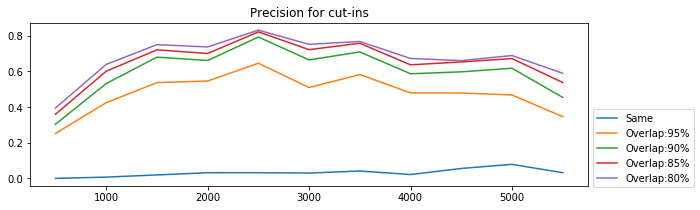

In [3]:
same_P = [0, 0.007159904534606206 , 0.01937046004842615 ,0.031862745098039214  ,0.03194103194103194  ,0.03  ,0.041463414634146344  ,0.021479713603818614 ,0.05569007263922518 ,0.07881773399014778 ,0.03194103194103194 ]
con95_P = [0.2523364485981308 ,0.42482100238663484 ,0.5375302663438256 ,0.5465686274509803  ,0.6461916461916462  ,0.51  , 0.5829268292682926 ,0.4797136038186158 ,0.4794188861985472 ,0.46798029556650245 , 0.3464373464373464]
con90_P = [0.3037383177570093 , 0.5322195704057279 ,0.6803874092009685  ,0.6617647058823529  ,0.7931873479318735  ,0.665  ,0.7097560975609756  ,0.5871121718377088 ,0.5980629539951574 ,0.6182266009852216 , 0.45454545454545453]
con85_P = [0.3598130841121495 , 0.6014319809069213 , 0.7215496368038741 , 0.7009803921568627 , 0.8223844282238443 , 0.7225 ,0.7585365853658537  , 0.6372315035799523, 0.6537530266343826, 0.6724137931034483,0.538083538083538  ]
con80_P = [0.39485981308411217 ,0.639618138424821 , 0.7506053268765133 ,0.7377450980392157  ,0.8321167883211679  ,0.7525  ,0.7682926829268293  , 0.6730310262529833, 0.6610169491525424,0.6896551724137931 ,0.5896805896805897 ]


x = [500, 1000, 1500, 2000,2500,3000,3500,4000,4500,5000,5500 ]

f, ax = plt.subplots(figsize=(10,3))
plt.plot(x, same_P)
plt.plot(x, con95_P)
plt.plot(x, con90_P)
plt.plot(x, con85_P)
plt.plot(x, con80_P)

plt.legend(['Same', 'Overlap:95%', 'Overlap:90%', 'Overlap:85%', 'Overlap:80%'], loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title('Precision for cut-ins')
plt.show()


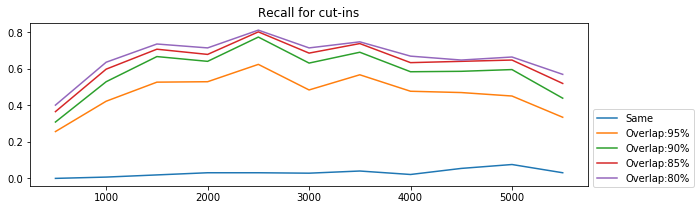

In [4]:
same_R = [0,0.0071090047393364926, 0.018957345971563982,0.030805687203791468 ,0.030805687203791468 , 0.02843601895734597, 0.04028436018957346,0.02132701421800948 , 0.054502369668246446,0.07582938388625593 ,0.030805687203791468]
con95_R = [0.2559241706161137,0.4218009478672986,0.5260663507109005 , 0.5284360189573459, 0.6232227488151659,0.4834123222748815 ,0.566350710900474 , 0.476303317535545,0.46919431279620855 , 0.45023696682464454, 0.3341232227488152]
con90_R = [0.3080568720379147,0.5284360189573459, 0.6658767772511849, 0.6398104265402843, 0.7725118483412322, 0.6303317535545023,0.6895734597156398 , 0.5829383886255924,0.5853080568720379 , 0.5947867298578199,0.43838862559241704]
con85_R = [0.36492890995260663, 0.5971563981042654, 0.7061611374407583,0.6777251184834123 ,0.8009478672985783 ,0.6848341232227488 ,0.7369668246445498 ,0.6327014218009479 , 0.6398104265402843,0.6469194312796208 ,0.518957345971564  ]
con80_R = [0.4004739336492891, 0.6350710900473934, 0.7345971563981043,0.7132701421800948 ,0.8104265402843602 ,0.7132701421800948 , 0.7464454976303317,0.6682464454976303 ,0.6469194312796208 , 0.6635071090047393, 0.5687203791469194 ]

f, ax = plt.subplots(figsize=(10,3))
plt.plot(x, same_R)
plt.plot(x, con95_R)
plt.plot(x, con90_R)
plt.plot(x, con85_R)
plt.plot(x, con80_R)

plt.legend(['Same', 'Overlap:95%', 'Overlap:90%', 'Overlap:85%', 'Overlap:80%'], loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title('Recall for cut-ins')
plt.show()


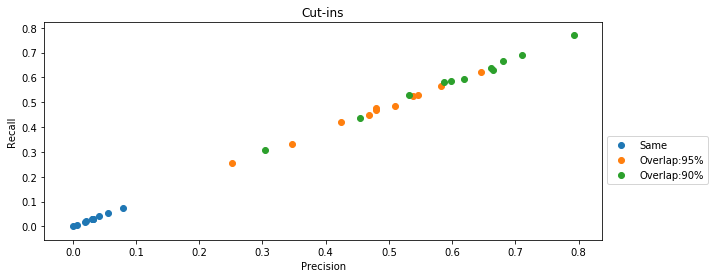

In [10]:
f, ax = plt.subplots(figsize=(10,4))
plt.scatter(same_P, same_R)
plt.scatter(con95_P, con95_R)
plt.scatter(con90_P, con90_R)
#plt.plot(con85_P, con85_R)
#plt.plot(con80_P, con80_R)

plt.legend(['Same', 'Overlap:95%', 'Overlap:90%', 'Overlap:85%', 'Overlap:80%'], loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title('Cut-ins')
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.show()


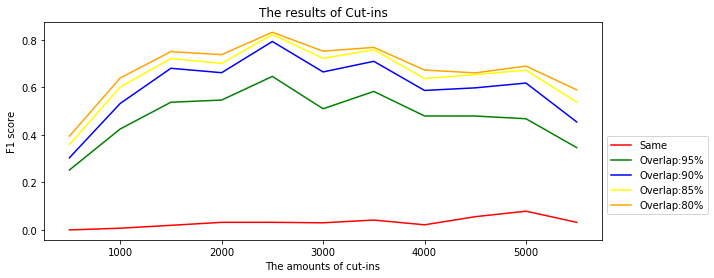

In [6]:
f, ax = plt.subplots(figsize=(10,4))
plt.plot(x, same_P, color='red')
plt.plot(x, con95_P, color='green')
plt.plot(x, con90_P, color='blue')
plt.plot(x, con85_P, color='yellow')
plt.plot(x, con80_P, color='orange')

#plt.plot(x, same_R, color='red')
#plt.plot(x, con95_R, color='green')
#plt.plot(x, con90_R, color='blue')
#plt.plot(x, con85_R, color='yellow')
#plt.plot(x, con80_R, color='orange')

plt.legend(['Same', 'Overlap:95%', 'Overlap:90%', 'Overlap:85%', 'Overlap:80%'], loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title('The results of Cut-ins')
plt.xlabel('The amounts of cut-ins')
plt.ylabel('F1 score')
plt.show()


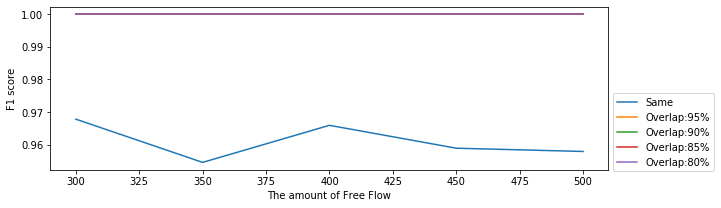

In [32]:
same_R = [0.9678638941398866,0.9546313799621928, 0.9659735349716446,0.9589735349716446, 0.9579735349716446]
con95_R = [1,1,1,1,1]
con90_R = [1,1,1,1,1]
con85_R = [1,1,1,1,1]
con80_R = [1,1,1,1,1]

x = [300, 350, 400, 450, 500]

f, ax = plt.subplots(figsize=(10,3))
plt.plot(x, same_R)
plt.plot(x, con95_R)
plt.plot(x, con90_R)
plt.plot(x, con85_R)
plt.plot(x, con80_R)

plt.legend(['Same', 'Overlap:95%', 'Overlap:90%', 'Overlap:85%', 'Overlap:80%'], loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlabel('The amount of Free Flow')
plt.ylabel('F1 score')
plt.show()



In [24]:
2*0.21035058430717862*0.30656934306569344 / (0.21035058430717862+0.30656934306569344)

0.2495049504950495

In [28]:
2*0.8614357262103506*1 / (0.8614357262103506+1)

0.9255605381165919

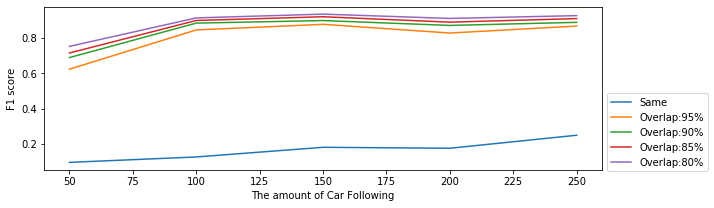

In [33]:
same_R = [0.09601873536299765,0.12671594508975714,0.18126888217522658,0.17591623036649215,0.2495049504950495]
con95_R = [0.6229508196721312,0.8447729672650476,0.8764478764478765,0.8272251308900525,0.8666035950804163]
con90_R = [0.6885245901639344,0.8833333333333333,0.8977272727272727,0.8701973001038422,0.8876508820798515]
con85_R = [0.7142857142857143,0.8982528263103803,0.9192200557103063,0.8886618998978549,0.9089253187613844]
con80_R = [0.7517564402810304,0.9127789046653144,0.9340659340659341,0.9098196392785571,0.9255605381165919]

x = [50, 100, 150, 200, 250]

f, ax = plt.subplots(figsize=(10,3))
plt.plot(x, same_R)
plt.plot(x, con95_R)
plt.plot(x, con90_R)
plt.plot(x, con85_R)
plt.plot(x, con80_R)

plt.legend(['Same', 'Overlap:95%', 'Overlap:90%', 'Overlap:85%', 'Overlap:80%'], loc='upper left', bbox_to_anchor=(1, 0.5))
#plt.title('Recall for cut-ins')
#plt.title('The results of Cut-ins')
plt.xlabel('The amount of Car Following')
plt.ylabel('F1 score')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()